In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = 'iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x_prime = data[list(range(4))]
y = pd.Categorical(data[4]).codes
x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime, y, test_size=0.3, random_state=0)
feature_pairs = [[0,1],[0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

特征 花萼长度 + 花萼宽度
	训练集准确率:87.6190$$
	测试集准确率:75.5556$$
特征 花萼长度 + 花瓣长度
	训练集准确率:99.0476$$
	测试集准确率:88.8889$$
特征 花萼长度 + 花瓣宽度
	训练集准确率:98.0952$$
	测试集准确率:88.8889$$
特征 花萼宽度 + 花瓣长度
	训练集准确率:100.0000$$
	测试集准确率:95.5556$$
特征 花萼宽度 + 花瓣宽度
	训练集准确率:98.0952$$
	测试集准确率:93.3333$$
特征 花瓣长度 + 花瓣宽度
	训练集准确率:99.0476$$
	测试集准确率:97.7778$$


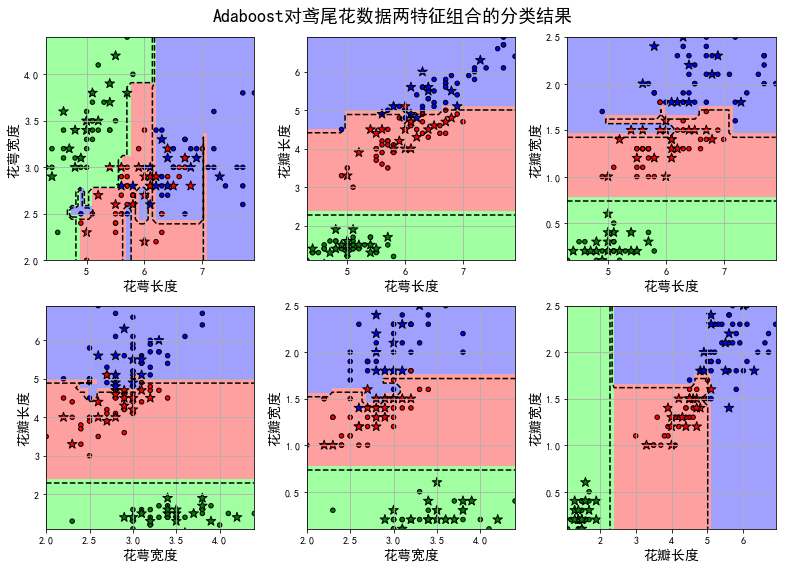

In [23]:
plt.figure(figsize=(11,8),facecolor='#FFFFFF')
for i,pair in enumerate(feature_pairs):
    # 准备数据
    x_train = x_prime_train[pair]
    x_test = x_prime_test[pair]
    # 决策树学习
    base_estimator = DecisionTreeClassifier(criterion='gini',max_depth=3,
                                           min_samples_split=4)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=10,
                              learning_rate=0.1)
    model.fit(x_train,y_train)
    
    # 画图
    N,M = 500,500 # 纵横各采样多少个值
    x1_min,x2_min = x_train.min()
    x1_max,x2_max = x_train.max()
    t1 = np.linspace(x1_min,x1_max)
    t2 = np.linspace(x2_min,x2_max)
    x1,x2 = np.meshgrid(t1,t2)
    x_show = np.stack((x1.flat,x2.flat),axis=1)
    
    # 在测试集上预测结果
    y_train_pred = model.predict(x_train)
    acc_train = accuracy_score(y_train,y_train_pred)
    y_test_pred = model.predict(x_test)
    acc_test = accuracy_score(y_test,y_test_pred)
    print('特征',iris_feature[pair[0]], '+' ,iris_feature[pair[1]])
    print('\t训练集准确率:%.4f$$' % (100*acc_train))
    print('\t测试集准确率:%.4f$$' % (100*acc_test))
    
    cm_light = mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g','r','b'])
    y_hat = model.predict(x_show)
    y_hat = y_hat.reshape(x1.shape)
    
    plt.subplot(2,3,i+1)
    plt.contour(x1,x2,y_hat,colors='k',levels=[0,1],antialiased=True,
               linestyles='--',linewidths=1.5)
    plt.pcolormesh(x1,x2,y_hat,cmap=cm_light)
    plt.scatter(x_train[pair[0]],x_train[pair[1]],c=y_train,s=20,
               edgecolors='k',cmap=cm_dark)
    plt.scatter(x_test[pair[0]],x_test[pair[1]],c=y_test,s=100,marker='*',
               edgecolors='k',cmap=cm_dark)
    plt.xlabel(iris_feature[pair[0]],fontsize=14)
    plt.ylabel(iris_feature[pair[1]],fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid(b=True)
plt.suptitle(u'Adaboost对鸢尾花数据两特征组合的分类结果', fontsize=18)
plt.tight_layout(1,rect=(0,0,1,0.95)) # (left,bottom,right,top)
plt.show()

array([[ 4.3       ,  2.        ],
       [ 4.37346939,  2.        ],
       [ 4.44693878,  2.        ],
       ..., 
       [ 7.75306122,  4.4       ],
       [ 7.82653061,  4.4       ],
       [ 7.9       ,  4.4       ]])